# Investigating Fandago Movie Ratings

## 1. Introduction

[Fandango](https://www.fandango.com/) is an online movie ratings aggregator with a 5-star rating system on their website. Their rating range is between 0 stars and 5 stars. In October 2015, Walt Hickey (a data journalist) analyzed 8% of the ratings on the website and found that the ratings shown to users of the website are generally higher than the actual rating (see picture below).

<img src="https://fivethirtyeight.com/wp-content/uploads/2015/10/hickey-datalab-fandango-3.png?w=610" >


   [Source:FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings)


Fandango's officials claimed that this issue was caused by a bug in their system and promised to fix it as soon as possible. However, the acutal rating values are not shown in the HTML of their pages anymore and we can't tell if the issues has been fixed. To find out the answer, we are going to analyse the data on their [movie ratings in 2016 and 2017](https://github.com/mircealex/Movie_ratings_2016_17) in this project. We will compare the data against the [data in 2015](https://github.com/fivethirtyeight/data/tree/master/fandango) collected by Walt Hickey and see whether changes have been made in Fandagos's rating system since 2015.

## 2. Understanding the Data
First, let's explore the data to understand their structure.

In [1]:
import pandas as pd

fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

fandango_score_comparison.head(10)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [2]:
movie_ratings_16_17.head(10)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,4.20,4.0,4.0,4.5,4.0
6,A Street Cat Named Bob,2016,54,7.4,77,79,4.5,2.70,3.70,3.85,3.95,2.5,3.5,4.0,4.0
7,Alice Through the Looking Glass,2016,34,6.2,30,50,4.0,1.70,3.10,1.50,2.50,1.5,3.0,1.5,2.5
8,Allied,2016,60,7.1,61,66,4.0,3.00,3.55,3.05,3.30,3.0,3.5,3.0,3.5
9,Amateur Night,2016,38,5.0,0,27,3.5,1.90,2.50,0.00,1.35,2.0,2.5,0.0,1.5


We noticed that both data sets have several columns, some of which are not relevant for our analysis. Therefore, we need to extract the columns that are relevant for our analysis from the data sets.

In addition, from checking the README.md document of [data in 2015](https://github.com/fivethirtyeight/data/tree/master/fandango), we noticed that one of their data sampling criteria is 'the movie needs to have at least 30 fan reviews on Fandango'. The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. 

Similarly, the README.md document of [movie ratings in 2016 and 2017](https://github.com/mircealex/Movie_ratings_2016_17) shows that, instead of using random selection, the data only contains the most popular movies that were released in 2016 and 2017. This makes the data also unlikely to be representative of our population of interest.

## 3. Changing the Goal of Our Analysis

Based on the situation, we can either collect new data or change the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

## 4. Isolating the Samples We Need

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website. 

In [3]:
# check fan rating numbers in fandango data from 2015
sum(fandango_score_comparison['Fandango_votes']<30)

0

From the above checking, we know that the data from 2015 all have over 30 fan ratings. However, the data from 2016 and 2017 doesn't have the columns showing similar information. We should be skeptical and check whether the sample is truly representative and contains popular movies (movies with over 30 fan ratings).

We are going to quickly check the representativity of this sample by sampling randomly 10 movies from it and then checking the number of fan ratings ourselves on Fandango's website. Ideally, if at least 8 out of the 10 movies have 30 fan ratings or more, we would go ahead with our analysis.

In [4]:
movie_ratings_16_17.sample(10, random_state = 1)[['movie', 'year', 'fandango']]

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of April 2018, these are the fan ratings we found:

| Movie                                   | Fan ratings |
|-----------------------------------------|-------------|
| Mechanic: Resurrection                  | 2247        |
| Warcraft                                | 7271        |
| Max Steel                               | 493         |
| Me Before You                           | 5263        |
| Fantastic Beasts and Where to Find Them | 13400       |
| Cell                                    | 17          |
| Genius                                  | 127         |
| Sully                                   | 11877       |
| A Hologram for the King                 | 500         |
| Captain America: Civil War              | 35057       |

90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

Next we will isolate the samples we need for further analysis. 

In [5]:
fandango_score_16 = movie_ratings_16_17[movie_ratings_16_17['year'] == 2016][['movie', 'year', 'fandango']].copy()

#check results
fandango_score_16['year'].value_counts()

2016    191
Name: year, dtype: int64

We can confirm that all movies in the fandango_score_16 data set were released in 2016.

Earlier we noticed that not all the movies in the 2015 dataset are released in 2015. Therefore, we need to clean the data and select movies that were released in 2015.

In [6]:
# Isolate main  columns of interest
fandango_score_15 = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

# create a new column contanining information on which year the movies were released
fandango_score_15['year'] = fandango_score_15['FILM'].str.slice(start = -5, stop = -1)

#check data
fandango_score_15['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [7]:
# Isolate movies released in 2015 
fandango_score_15 = fandango_score_15[fandango_score_15['year']=='2015']

#check updated data
fandango_score_15['year'].value_counts()

2015    129
Name: year, dtype: int64

We can confirm all movies in the fandango_score_15 data set were released in 2015. 

## 5. Comparing Distribution Shapes for 2015 and 2016

After all the preliminary steps, we are ready to analyse the two samples now. First of all, we will make a high-level comparison between the shapes of the distrituions of movie ratings for both samples.

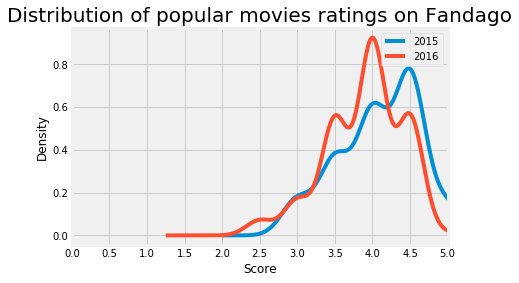

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fandango_score_15['Fandango_Stars'].plot.kde(label = 2015, legend = True)
fandango_score_16['fandango'].plot.kde(label = 2016, legend = True)

plt.title('Distribution of popular movies ratings on Fandago', fontsize = 20)
plt.xlabel('Score')
plt.xlim(0,5)
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.style.use('fivethirtyeight')

plt.show()

### Observations
Both distributions are left skewed, indicating the popular movies receive high ratings on Fangdago. However, compared to 2015, the distribution in 2016 have shifted slightly to the left. This shows that the scores in 2016 seem to have become lower. It is too early to draw the conclusion at the moment. We need to further analyse the data to confirm this hypothesis.

## 6. Comparing Relative Frequencies

Let's start with comparing the relative frequencies of the two distributions.

Text(0.5, 1.0, 'Boxplot of Fangdago Movie Ratings by year')

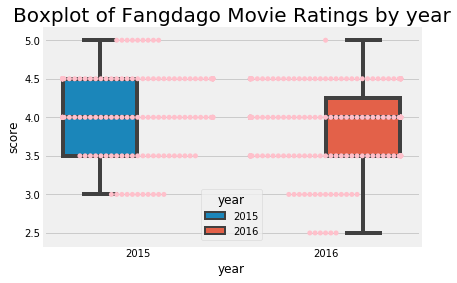

In [9]:
# create new dataframes to plot the data in boxplot
score_2016 = pd.DataFrame(columns=['score', 'year'])
score_2016['score'] = fandango_score_16['fandango']
score_2016['year'] = 2016

score_2015 = pd.DataFrame(columns=['score', 'year'])
score_2015['score'] = fandango_score_15['Fandango_Stars']
score_2015['year'] = 2015

score_sum = pd.concat([score_2015, score_2016])


# plot new data into boxplot to see the distribution of scores 


import seaborn as sns

sns.boxplot(x='year', y = 'score' , hue="year", data = score_sum )
sns.swarmplot(x='year', y = 'score', data = score_sum, color = 'pink') # Use swarmplot() to show the datapoints on top of the boxes
plt.title('Boxplot of Fangdago Movie Ratings by year', fontsize = 20)


### Observations

- The ratings from 2016 have the same median value as 2015.
- There is a lower percentage of movies with scores of 4.5 and above in 2016 than 2015. 
- 25% of the 2015 ratings are below 3.5, as low as 3.0 while 25% of the 2016 ratings are below 3.5, as low as 2.5.


## 7. Determine the Direction of Change 

Next we'll take a couple of summary statistics to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

Text(0.5, 1.1, 'Comparing summary statistics: 2015 vs 2016')

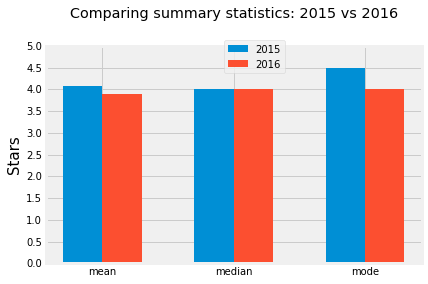

In [10]:
# calculate mean, median and mode of movie ratings
x = np.arange(3) 
stat_2015 = [score_2015['score'].mean(), score_2015['score'].median(), score_2015['score'].mode()]
stat_2016 = [score_2016['score'].mean(), score_2016['score'].median(), score_2016['score'].mode()]
width = 0.3

# plot data in grouped manner of bar type
plt.bar(x-0.15, stat_2015, width)
plt.bar(x+0.15, stat_2016, width)
plt.xticks(x, ['mean', 'median', 'mode'])
plt.ylabel("Stars", fontsize = 15)
plt.yticks(np.arange(0, 5.1, step=0.5))
plt.legend(["2015", "2016"], bbox_to_anchor = (0.65, 0.85))
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.1, loc = 'center')

### Observations

- The mean of the 2016 movie ratings is slightly lower than 2015
- The median of the movie ratings for 2016 is the same as 2015
- The mode of the 2016 movie ratings is 0.5 lower than 2015



## 8. Conclusions

From our analysis, we can conclude that the popular movies in 2016 have lower ratings on Fandago than 2015. 

It seems that Fandago did make changes to their rating system and fix the issue. 
